Online Retail Dataset Customer Segmentation Using Unsupervised Learning
Use online_retail_customers dataset from clustering.db database for this problem.
The objective of this project is to develop a customer segmentation model using unsupervised learning techniques on a real-world retail transaction dataset. The goal is to group customers based on purchasing behavior in order to support data-driven marketing and customer relationship strategies.
This will be achieved by engineering Recency, Frequency, and Monetary (RFM) features from the historical sales data and applying clustering algorithms to identify distinct customer segments. Each segment will be analyzed to understand its behavioral profile and potential business value.
Online Retail Dataset - Data Dictionary
1.	InvoiceNo
Type: String
Description: Unique identifier for each transaction. Invoices starting with 'C' indicate cancellations.
2.	StockCode
Type: String
Description: Product or item code. Serves as a unique identifier for each product.
3.	Description
Type: String
Description: Text description of the product.
4.	Quantity
Type: Integer
Description: Number of units purchased in the transaction.
5.	InvoiceDate
Type: Datetime
Description: Date and time when the invoice was generated.
6.	UnitPrice
Type: Float
Description: Price per unit of the product, in GBP (British Pounds).
7.	CustomerID
Type: String
Description: Unique identifier for a customer. Many entries are missing.
8.	Country
Type: String
Description: Country where the customer resides. Most entries are from the United Kingdom.
Instructions for Data Cleaning and RFM Feature Engineering
1.	Filter out customers with missing IDs
 Remove all rows where the CustomerID is missing. These rows cannot be used for customer-level analysis.
2.	Convert InvoiceDate column to datetime format
 Ensure the InvoiceDate column is properly converted to datetime, so we can perform date-based calculations.
3.	Exclude canceled orders
 Remove all transactions where the invoice number starts with 'C'. These indicate canceled orders and should not be used in analysis.
4.	Create a new feature called TotalPrice
 Add a column named TotalPrice by multiplying Quantity and UnitPrice. This gives the total value of each transaction.
5.	Set a reference date for calculating recency
 Choose a reference date as one day after the most recent invoice date. This will be used to measure how recently each customer made a purchase.
6.	Create the RFM table
 Group the data by CustomerID and compute the following:
1.	Recency: Days since the last purchase (based on the reference date).
2.	Frequency: Number of unique invoices per customer.
3.	Monetary: Total spending by each customer (sum of TotalPrice).
7.	Rename columns
 Name the resulting columns as CustomerID, Recency, Frequency, and Monetary.
Expected Deliverables
1.	Identify high-value and loyal customers for targeted retention strategies.
2.	Detect at-risk or inactive customers who need re-engagement.
3.	Recognize one-time buyers and low-value customers to design tailored marketing communication.
4.	Enable strategic marketing resource allocation based on distinct customer segments.

 




In [20]:
#importing the libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import sqlite3 
%matplotlib inline

In [21]:
#importing the DB file  

conn = sqlite3.connect("clustering.db") 
cursor = conn.cursor() 
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';") 
tables = cursor.fetchall() 
print(tables) 


[('tripadvisor_reviews',), ('supermarket_data',), ('ecommerce_behavior',), ('online_retail_customers',), ('amazon_book_reviews',)]


In [22]:
#connect to the sqlite database file  
conn =sqlite3.connect("clustering.db") 
#load the table from the database  
df=pd.read_sql("SELECT* FROM online_retail_customers",conn) 
#close the connection  
conn.close() 

In [23]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [24]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [25]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [27]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [28]:
df = df.dropna(subset=['CustomerID'])


In [29]:
df.shape

(406829, 8)

In [30]:
df = df.dropna(subset=['Description'])


In [31]:
df.shape

(406829, 8)

In [32]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [33]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [34]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [35]:
df = df[~df['InvoiceNo'].str.startswith('C')]


In [36]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [37]:
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)


In [38]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()


In [39]:
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


In [40]:
rfm.describe()


,CustomerID,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,92.518322,4.271952,2053.793018
std,1721.889758,100.009747,7.705493,8988.248381
min,12346.000000,1.000000,1.000000,0.000000
25%,13812.500000,18.000000,1.000000,307.245000
50%,15299.000000,51.000000,2.000000,674.450000
75%,16778.500000,142.000000,5.000000,1661.640000
max,18287.000000,374.000000,210.000000,280206.020000


In [41]:


rfm_log = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log1p)


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)


In [43]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [44]:
rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
})


,Recency,Frequency,Monetary,CustomerID
Cluster,,,,
0,18.725864,2.090584,538.231287,839
1,12.112033,13.634855,8015.424412,723
2,70.697380,4.076923,1791.090873,1183
3,184.023839,1.318068,342.421268,1594


In [45]:
cluster_map = {
    0: 'New / Occasional Buyers',
    1: 'Champions',
    2: 'Regular Customers',
    3: 'Inactive / At-Risk'
}

rfm['Cluster_Name'] = rfm['Cluster'].map(cluster_map)


In [46]:
cluster_summary = rfm.groupby('Cluster_Name')[['Recency','Frequency','Monetary']].mean()
cluster_summary


,Recency,Frequency,Monetary
Cluster_Name,,,
Champions,12.112033,13.634855,8015.424412
Inactive / At-Risk,184.023839,1.318068,342.421268
New / Occasional Buyers,18.725864,2.090584,538.231287
Regular Customers,70.697380,4.076923,1791.090873


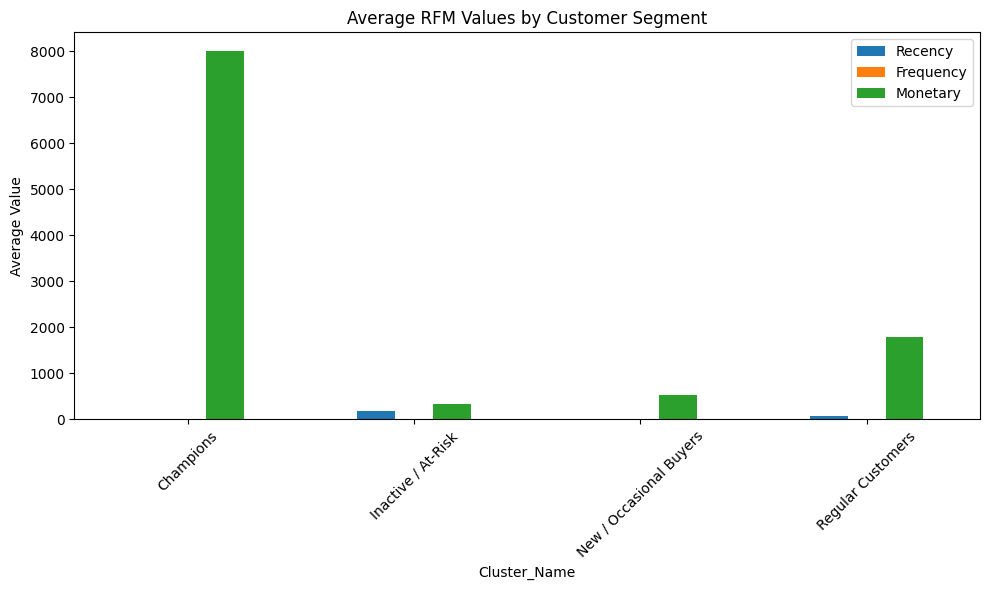

In [47]:
import matplotlib.pyplot as plt

cluster_summary.plot(kind='bar', figsize=(10,6))
plt.title('Average RFM Values by Customer Segment')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [48]:
from sklearn.cluster import KMeans

def run_kmeans(k):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(rfm_scaled)
    return labels


In [49]:
for k in [3, 4, 5]:
    labels = run_kmeans(k)
    print(f"\nClusters = {k}")
    print(pd.Series(labels).value_counts())



Clusters = 3
2    1867
0    1693
1     779
Name: count, dtype: int64

Clusters = 4
3    1594
2    1183
0     839
1     723
Name: count, dtype: int64

Clusters = 5
3    1185
2    1030
4     913
0     850
1     361
Name: count, dtype: int64


In [50]:
from sklearn.metrics import silhouette_score

for k in [3, 4, 5]:
    labels = run_kmeans(k)
    score = silhouette_score(rfm_scaled, labels)
    print(f"K={k}, Silhouette Score={score:.3f}")


K=3, Silhouette Score=0.336
K=4, Silhouette Score=0.336
K=5, Silhouette Score=0.316
